In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import pandas_datareader
import datetime as dt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

In [2]:
def generate_data(index_saham, start, end):
    data_all = pandas_datareader.data.DataReader(index_saham, 'yahoo', start,end)
    data_all.reset_index(inplace=True)
    x_all = pd.DataFrame(data_all.Date.astype(str).str.split('-').tolist(),columns="year month date".split())
    y_all = data_all.Close
    return x_all, y_all, data_all
start_date = dt.datetime(2018, 12, 31)
end_date = dt.datetime.now()
x_all, y_all, data_all = generate_data('NFLX', start_date, end_date)
x_all

,year,month,date
0,2018,12,31
1,2019,01,02
2,2019,01,03
3,2019,01,04
4,2019,01,07
5,2019,01,08
6,2019,01,09
7,2019,01,10
8,2019,01,11
9,2019,01,14


In [3]:
def tranformasi_data(x_all, x_tr):
    scaler = StandardScaler()
    scaler.fit(x_all)
    x_all_tr = scaler.transform(x_tr)
    return x_all_tr
x_all_tr = tranformasi_data(x_all, x_all)

C:\Users\Alvaro Basily\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Alvaro Basily\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [4]:
def model(x_all_tr, y_all):
    gcs = GridSearchCV(SVR(kernel='rbf'),
                       param_grid={'gamma': [1,2,3,4,5, 6, 7, 8, 9, 10]},
                       cv=5,
                       scoring='neg_mean_squared_error')
    grid_result = gcs.fit(x_all_tr, y_all)
    best_params = grid_result.best_params_
    best_svr = SVR(kernel='rbf', C=1e3, gamma=best_params["gamma"])
    best_svr.fit(x_all_tr, y_all)
    y_pred = best_svr.predict(x_all_tr)
    return y_pred, best_svr
y_pred, best_svr = model(x_all_tr, y_all)

C:\Users\Alvaro Basily\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [5]:
best_svr

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

C:\Users\Alvaro Basily\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


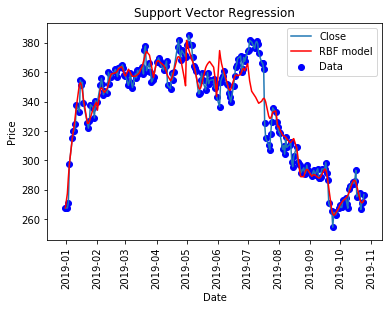

In [6]:
def plot(y_pred, data_all):
    fig, ax1 = plt.subplots()
    plt.plot(data_all.Date, data_all.Close)
    monthyearFmt = mdates.DateFormatter('%Y-%m')
    ax1.xaxis.set_major_formatter(monthyearFmt)
    _ = plt.xticks(rotation=90)
    plt.plot(data_all.Date, y_pred, c='r', label='RBF model')
    plt.scatter(data_all.Date, data_all.Close, c='b', label='Data')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title('Support Vector Regression')
    plt.legend()
    plt.show()
plot(y_pred, data_all)

In [13]:

output = []
prediksi_tanggal = '2019-11-20'
y, m, d = prediksi_tanggal.split('-')
c = [[y, m, d]]
c_tr = tranformasi_data(x_all, c)
best_svr.predict(c_tr)
output.append(best_svr.predict(c_tr)[0])

C:\Users\Alvaro Basily\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [14]:
output

[277.455614795481]

In [15]:
prediksi_tanggal = '2019-11-21'
y, m, d = prediksi_tanggal.split('-')
c = [[y, m, d]]
c_tr = tranformasi_data(x_all, c)
best_svr.predict(c_tr)
output.append(best_svr.predict(c_tr)[0])

C:\Users\Alvaro Basily\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


In [16]:
output

[277.455614795481, 280.4337597541768]